In [111]:
__author__ =  'Julia Schmid'

# DAMI01 Data Mining
## Erstellung eines Data Mining Projektes unter der Berücksichtigung des CRISP-DM Ansatzes

In [112]:
# Auskommentieren für die Installation der benötigen Pakete?
#pip install numpy pandas matplotlib math seaborn os
# #X!X 

### Einstellungen

In [113]:
# Imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


# Alle Spalten eines Datensatzes anzeigen
pd.set_option('display.max_columns', None) 

### Daten einlesen
Datenquelle:

In [114]:
df = pd.read_csv("Air_Traffic_Passenger_Statistics.csv", sep=',')

### Daten Verstehen 

**Struktur**

In [115]:
df.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [116]:
# Ausgabe der Anzahl der Zeilen und Spalten
print(f'Anzahl Zeilen: {df.shape[0]}')
print(f'Anzahl Spalten: {df.shape[1]}')

Anzahl Zeilen: 15007
Anzahl Spalten: 17


In [117]:
# Ausgabe der Datensatz-Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        15007 non-null  int64 
 1   Activity Period              15007 non-null  int64 
 2   Operating Airline            15007 non-null  object
 3   Operating Airline IATA Code  14953 non-null  object
 4   Published Airline            15007 non-null  object
 5   Published Airline IATA Code  14953 non-null  object
 6   GEO Summary                  15007 non-null  object
 7   GEO Region                   15007 non-null  object
 8   Activity Type Code           15007 non-null  object
 9   Price Category Code          15007 non-null  object
 10  Terminal                     15007 non-null  object
 11  Boarding Area                15007 non-null  object
 12  Passenger Count              15007 non-null  int64 
 13  Adjusted Activity Type Code  15

In [118]:
# Bestimmung der Numerische Variablen 
numerical_var = [col for col in df if df[col].dtype != 'object']
print(numerical_var)

# Bestimmung der Kategorische Variablen
categorical_var = [col for col in df if df[col].dtype == 'object']
print(categorical_var)

['index', 'Activity Period', 'Passenger Count', 'Adjusted Passenger Count', 'Year']
['Operating Airline', 'Operating Airline IATA Code', 'Published Airline', 'Published Airline IATA Code', 'GEO Summary', 'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal', 'Boarding Area', 'Adjusted Activity Type Code', 'Month']


**Beschreibung der Daten**

In [119]:
# Ausgabe der Statistischenkennzahlen der numerischen Variablen
df.describe()

,index,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,15007.00000,15007.000000,15007.000000,15007.000000,15007.000000
mean,7503.00000,201045.073366,29240.521090,29331.917105,2010.385220
std,4332.29208,313.336196,58319.509284,58284.182219,3.137589
min,0.00000,200507.000000,1.000000,1.000000,2005.000000
25%,3751.50000,200803.000000,5373.500000,5495.500000,2008.000000
50%,7503.00000,201011.000000,9210.000000,9354.000000,2010.000000
75%,11254.50000,201308.000000,21158.500000,21182.000000,2013.000000
max,15006.00000,201603.000000,659837.000000,659837.000000,2016.000000


**Variablen graphisch Darstellen**

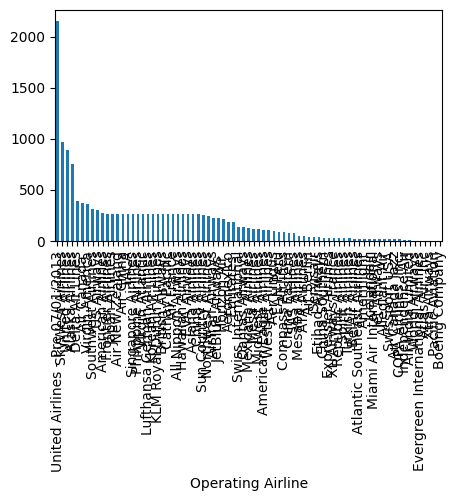

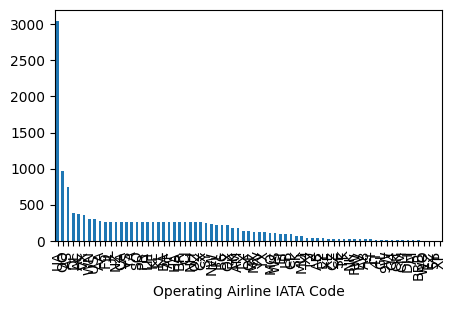

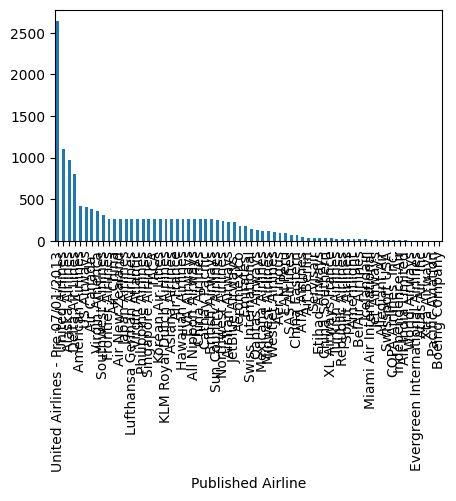

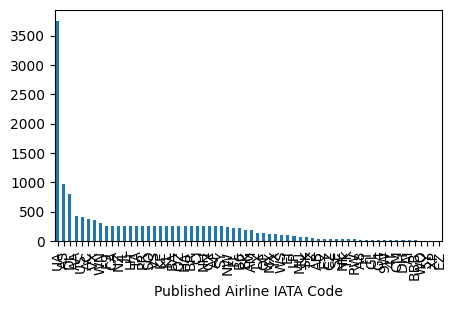

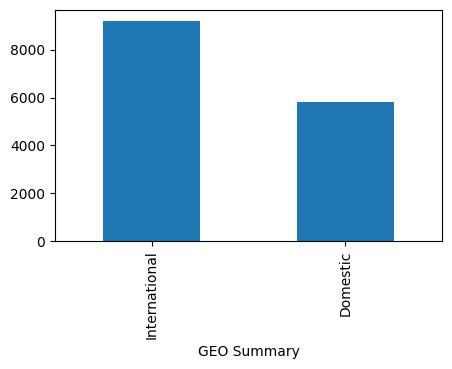

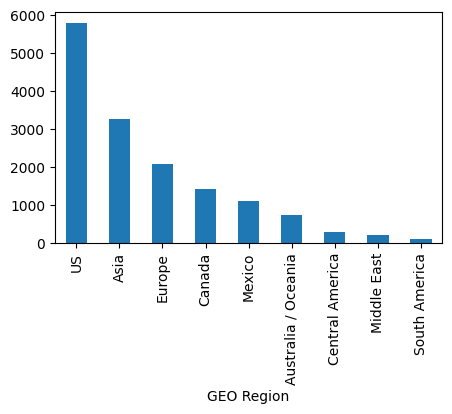

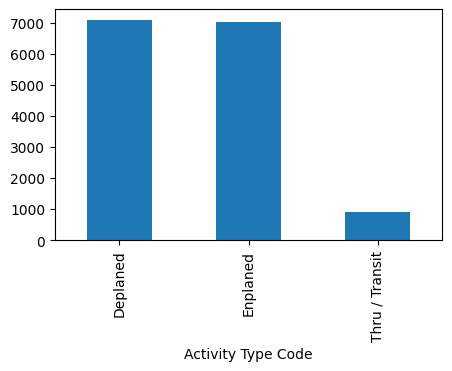

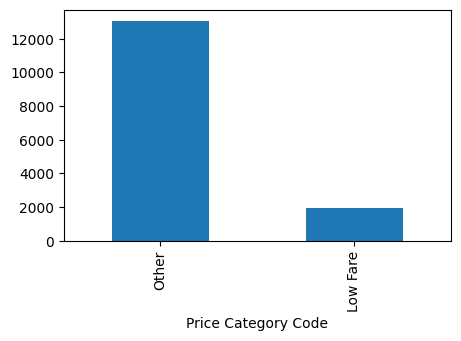

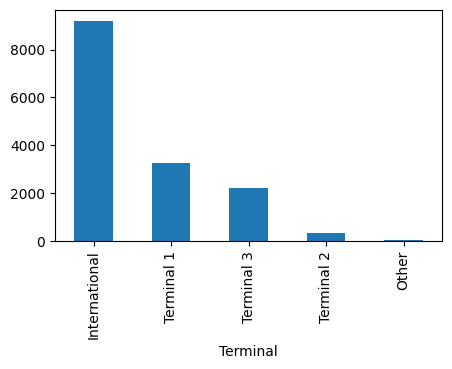

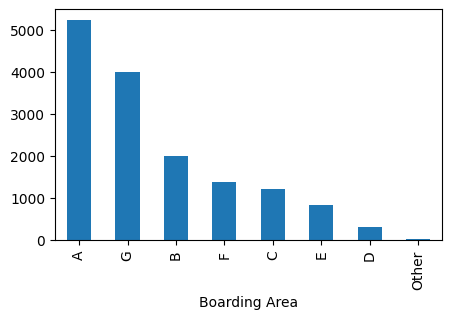

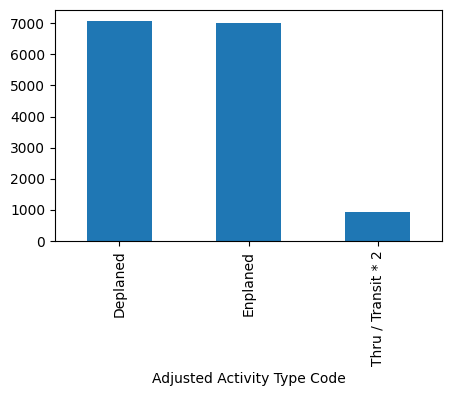

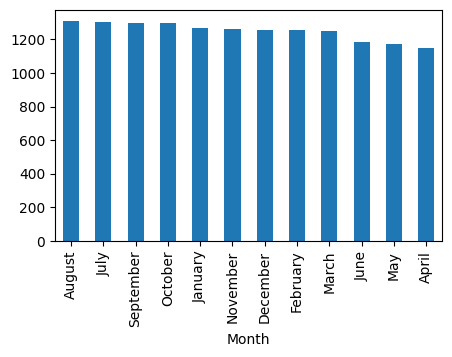

In [120]:
# Kategorische Variablen plotten 
for i in categorical_var:
    plt.figure(figsize=(5, 3)) 
    df[i].value_counts().plot(kind='bar')
    plt.show()

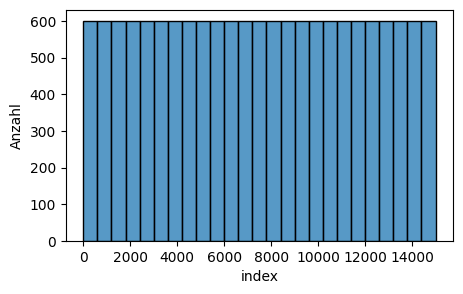

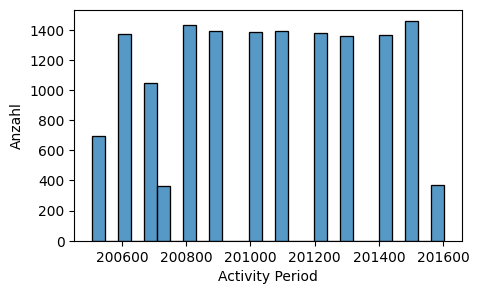

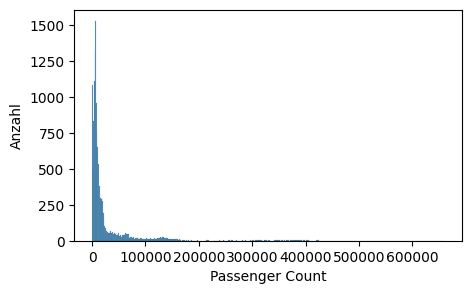

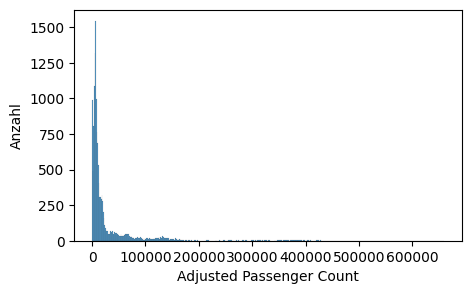

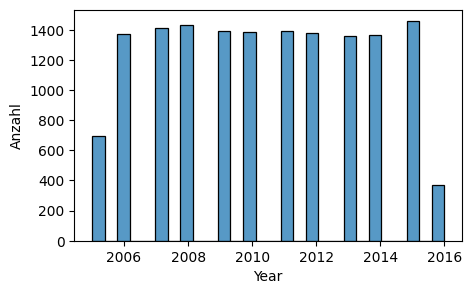

In [121]:
# Numerische Variablen plotten 
for i in numerical_var:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=df, x=i)  
    plt.xlabel(i)  
    plt.ylabel('Anzahl')        
    plt.show()

### Daten aufbereiten

#### Daten Bereinigung  

**NaN-Werte**

In [122]:
# Ausgabe des Namens der Variablen mit NaN-Werte und die Anzahl der Einträge mit NaN-Werten
count_nan = df.isna().sum()
count_nan[count_nan > 0]

Operating Airline IATA Code    54
Published Airline IATA Code    54
dtype: int64

In [123]:
df = df.dropna()